In [2]:
import pandas as pd

def load_reduced_healthcare_data(file_path, sample_size=3000):
    """Loads a reduced sample of the healthcare dataset."""
    relevant_columns = [
        'Age', 'Gender', 'Blood Type', 'Medical Condition', 
        'Insurance Provider', 'Billing Amount', 'Admission Type', 'Test Results'
    ]

    try:
        # Read dataset and select relevant columns
        full_data = pd.read_csv(file_path, usecols=relevant_columns, engine='python')

        # Sample the dataset to retain only 3000 rows
        reduced_data = full_data.sample(n=min(sample_size, len(full_data)), random_state=42)
        return reduced_data

    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

# Load dataset
dataset_path = "healthcare_dataset.csv"
patient_data_reduced = load_reduced_healthcare_data(dataset_path)

# Display first few rows
patient_data_reduced.head()


,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Test Results
31641,57,Male,O+,Diabetes,Medicare,3616.898450,Elective,Inconclusive
9246,51,Female,A+,Diabetes,Aetna,36970.075481,Emergency,Abnormal
1583,20,Male,A+,Asthma,Blue Cross,44393.001348,Elective,Inconclusive
36506,74,Female,B+,Obesity,Aetna,27554.923708,Emergency,Abnormal
11259,56,Male,AB-,Obesity,Aetna,27466.318567,Emergency,Inconclusive


In [3]:
from sklearn.preprocessing import LabelEncoder

def preprocess_healthcare_data(data):
    """Cleans and encodes the dataset for ML models."""
    data = data.drop_duplicates().dropna()  # Remove duplicates & missing values
    
    # Encode categorical variables
    categorical_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type']
    label_encoders = {}

    for column in categorical_columns:
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])
    
    return data, label_encoders

# Preprocess dataset
cleaned_data, encoders = preprocess_healthcare_data(patient_data_reduced)

# Display processed dataset
cleaned_data.head()


,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Test Results
31641,57,1,6,3,3,3616.898450,0,Inconclusive
9246,51,0,0,3,0,36970.075481,1,Abnormal
1583,20,1,0,1,1,44393.001348,0,Inconclusive
36506,74,0,4,5,0,27554.923708,1,Abnormal
11259,56,1,3,5,0,27466.318567,1,Inconclusive


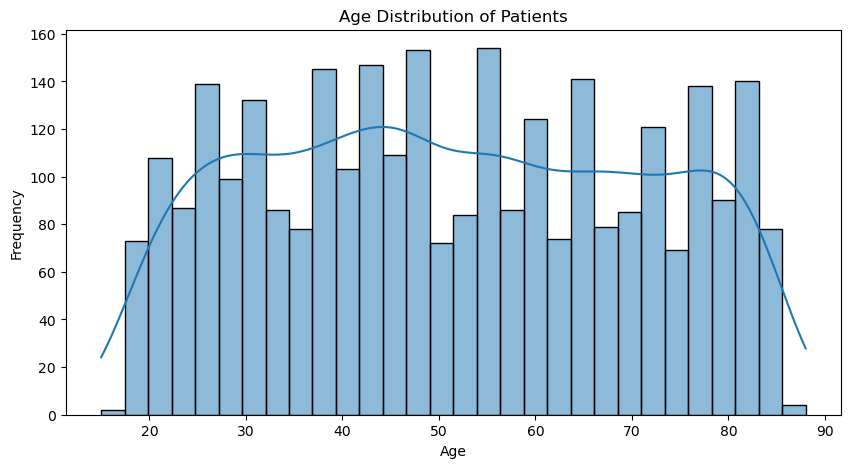

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_age_distribution(data):
    """Plots the age distribution of patients."""
    plt.figure(figsize=(10, 5))
    sns.histplot(data['Age'], bins=30, kde=True)
    plt.title("Age Distribution of Patients")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()

# Execute Age Distribution Plot
plot_age_distribution(cleaned_data)


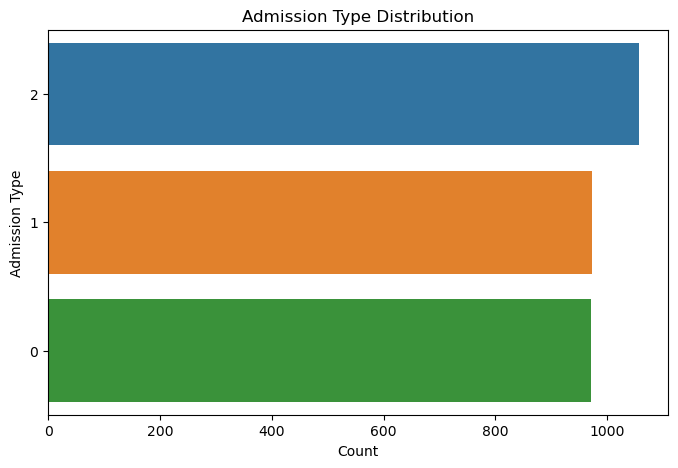

In [5]:
def plot_admission_type_distribution(data):
    """Plots the count of different admission types."""
    plt.figure(figsize=(8, 5))
    sns.countplot(y=data['Admission Type'], order=data['Admission Type'].value_counts().index)
    plt.title("Admission Type Distribution")
    plt.xlabel("Count")
    plt.ylabel("Admission Type")
    plt.show()

# Execute Admission Type Distribution Plot
plot_admission_type_distribution(cleaned_data)


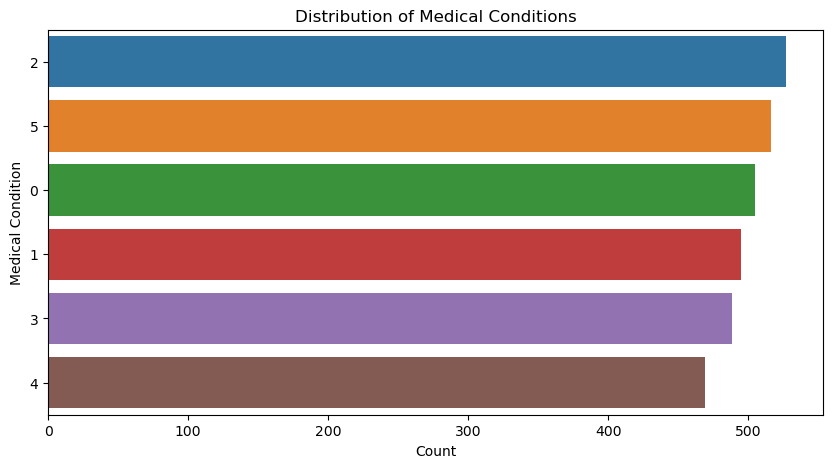

In [6]:
def plot_medical_condition_distribution(data):
    """Plots the distribution of medical conditions."""
    plt.figure(figsize=(10, 5))
    sns.countplot(y=data['Medical Condition'], order=data['Medical Condition'].value_counts().index)
    plt.title("Distribution of Medical Conditions")
    plt.xlabel("Count")
    plt.ylabel("Medical Condition")
    plt.show()

# Execute Medical Condition Distribution Plot
plot_medical_condition_distribution(cleaned_data)


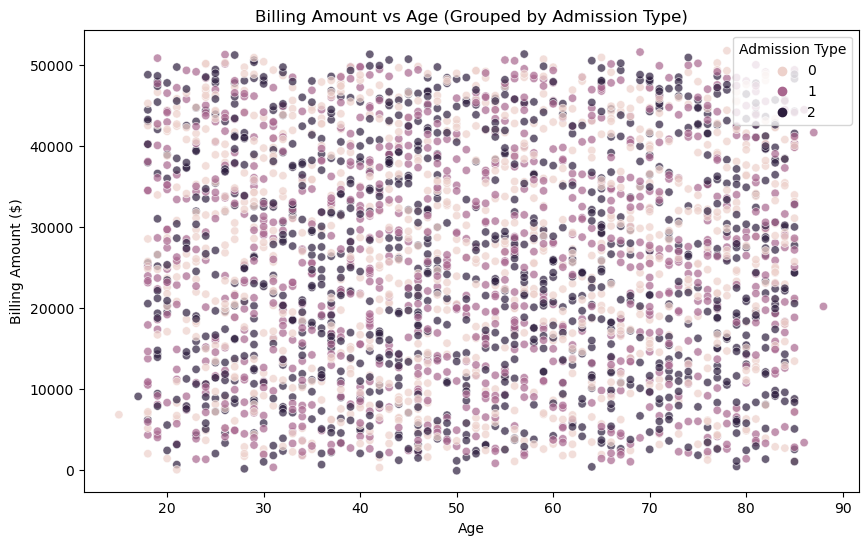

In [7]:
def plot_billing_vs_age(data):
    """Plots Billing Amount vs Age, grouped by Admission Type."""
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data['Age'], y=data['Billing Amount'], hue=data['Admission Type'], alpha=0.7)
    plt.title("Billing Amount vs Age (Grouped by Admission Type)")
    plt.xlabel("Age")
    plt.ylabel("Billing Amount ($)")
    plt.show()

# Execute Billing Amount vs Age Plot
plot_billing_vs_age(cleaned_data)


In [8]:
def select_best_features(data):
    """Selects the most relevant features for predicting Test Results."""
    
    selected_features = ['Age', 'Billing Amount', 'Medical Condition', 'Admission Type']
    return data[selected_features + ['Test Results']]  # Keeping target column

# Apply feature selection
filtered_data = select_best_features(cleaned_data)

# Display first few rows
filtered_data.head()


,Age,Billing Amount,Medical Condition,Admission Type,Test Results
31641,57,3616.898450,3,0,Inconclusive
9246,51,36970.075481,3,1,Abnormal
1583,20,44393.001348,1,0,Inconclusive
36506,74,27554.923708,5,1,Abnormal
11259,56,27466.318567,5,1,Inconclusive


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

def split_data_for_model(data, target_column='Test Results'):
    """Splits the dataset into training and testing sets using Test Results as the target."""
    
    # Encode the target variable
    label_encoder = LabelEncoder()
    data[target_column] = label_encoder.fit_transform(data[target_column])

    # Separate features (X) and target variable (y)
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Split data into train-test sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    return X_train, X_test, y_train, y_test, label_encoder

# Apply train-test split
X_train, X_test, y_train, y_test, target_encoder = split_data_for_model(filtered_data)

# Display dataset shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2400, 4), (600, 4), (2400,), (600,))